In [147]:
import numpy as np
import sep

In [148]:
#Basically setting up image and plots for it
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mlp
%matplotlib inline

rcParams['figure.figsize'] = [10.,8.]

In [149]:
#Reading image into 2-d numpy array
from astropy.utils.data import download_file
url="https://github.com/sep-developers/sep/raw/refs/heads/main/data/image.fits"
filename = download_file(url, cache=True)

hdu = fits.open(filename)
hdu.info()

data = hdu[0].data.astype(float)


Filename: /Users/davincitb/.astropy/cache/download/url/1ba1ef341f8a95ce19364ef95d9a0ad2/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


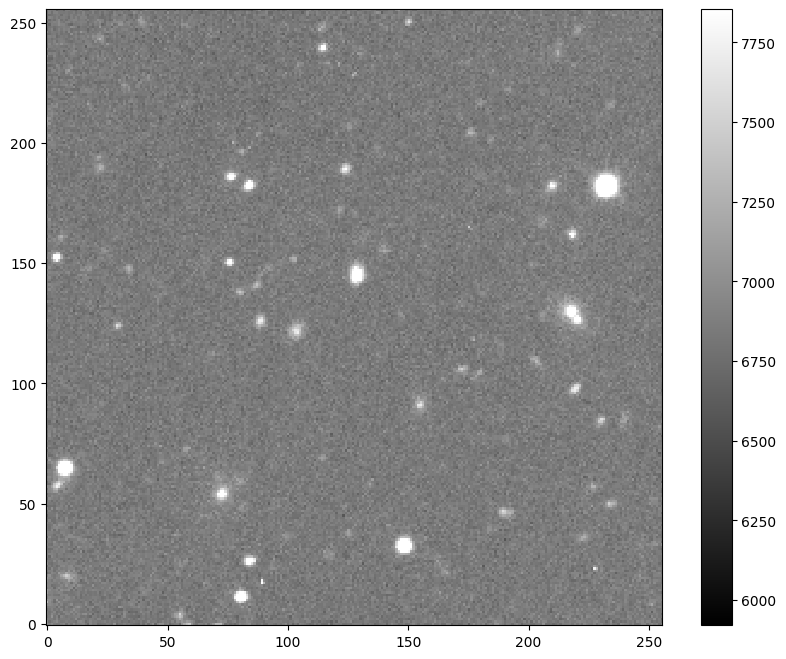

<Figure size 1000x800 with 0 Axes>

In [150]:
#Show image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()
plt.savefig('1.pdf',bbox_inches = 'tight',dpi = 300)

In [151]:
#Measure spatially varying background
bkg = sep.Background(data)

In [152]:
#Get general mean and noise
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [153]:
#Evaluating background
bkg_image = bkg.back()

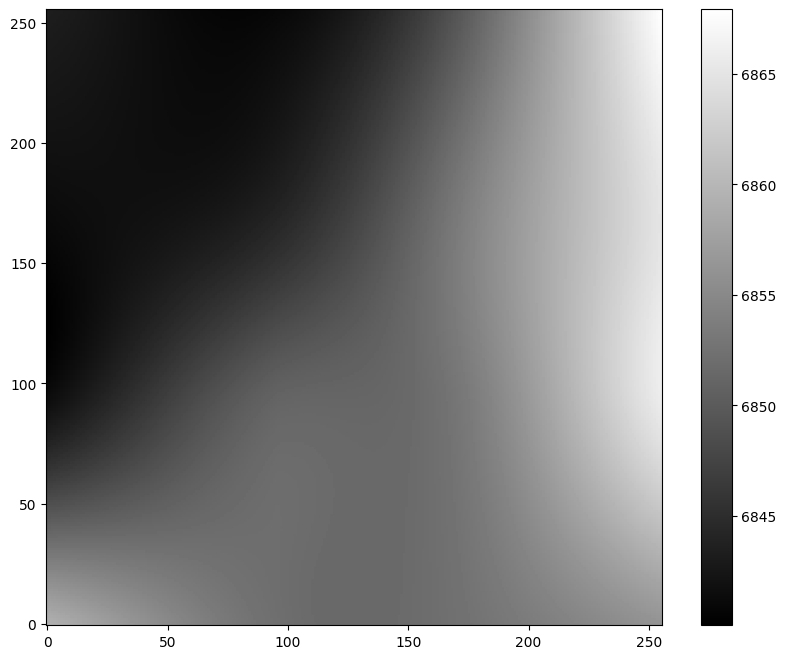

<Figure size 1000x800 with 0 Axes>

In [154]:
#Showing background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.show()
plt.savefig('2.pdf',bbox_inches = 'tight',dpi = 300)

In [155]:
#Now as 2d array
bkg_rms = bkg.rms()

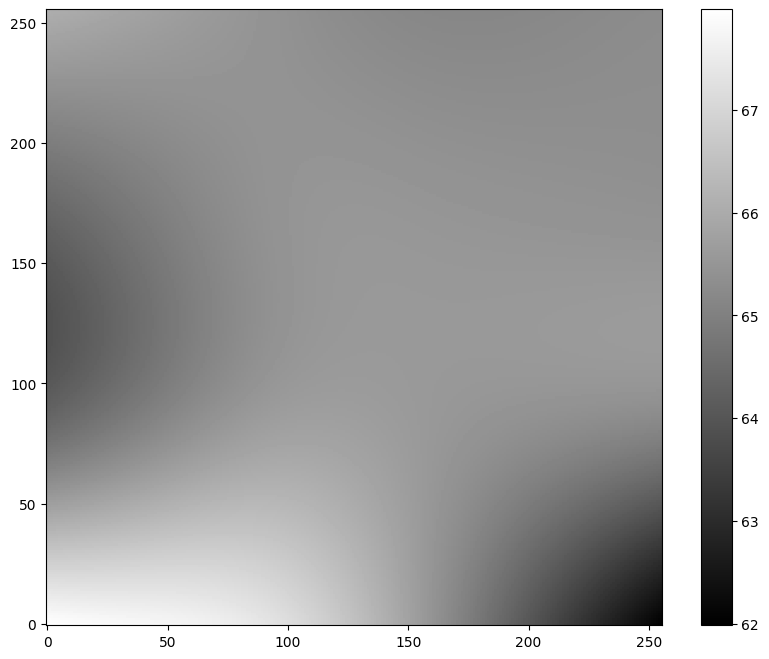

<Figure size 1000x800 with 0 Axes>

In [156]:
#Show background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.show()
plt.savefig('3.pdf',bbox_inches = 'tight',dpi = 300)

In [157]:
#subtracting background
data_sub = data - bkg

In [158]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
#objects detected
len(objects)

68

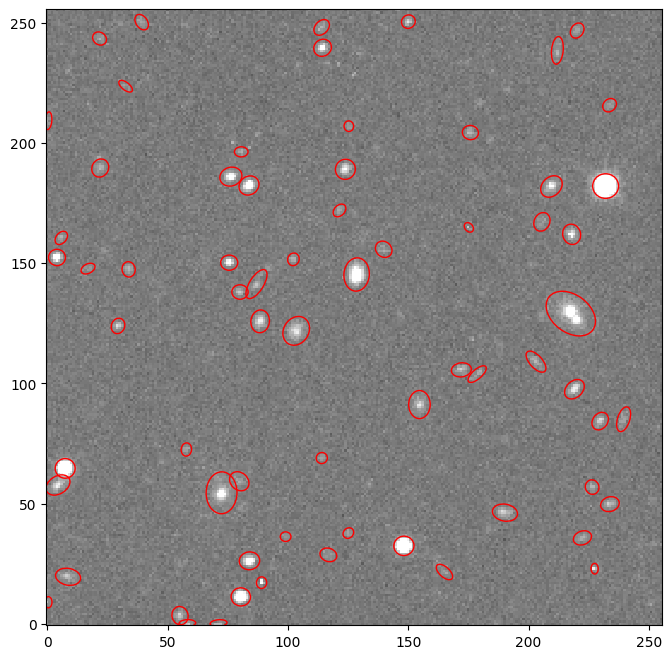

<Figure size 1000x800 with 0 Axes>

In [159]:
from matplotlib.patches import Ellipse

# plot reduced background image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an object ellipse
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.show()
plt.savefig('4.pdf',bbox_inches = 'tight',dpi = 300)

In [160]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [161]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
# show first 10 results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
